In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json("../Data/MLA_100k.jsonlines",lines=True)

In [4]:
df.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


Con este primer acercamiento a los datos podemos observar que la variable que nos interesa es la variable "condition", centraremos nuestro analisis en esta variable aunque primero vamos a ver si descartamos algunas colunmas que a primera vista parecen ser innecesarias.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [6]:
df.describe()

,base_price,seller_id,price,official_store_id,differential_pricing,original_price,catalog_product_id,subtitle,initial_quantity,sold_quantity,available_quantity
count,1.000000e+05,1.000000e+05,1.000000e+05,818.000000,0.0,143.000000,1.100000e+01,0.0,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,8.425269e+07,5.252433e+04,206.443765,NaN,1593.341958,3.727643e+06,NaN,35.093370,2.396990,34.842380
std,8.623127e+06,5.497257e+07,8.623127e+06,128.252953,NaN,2245.798072,1.884698e+06,NaN,421.076196,42.685077,420.808403
min,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,NaN,120.000000,9.440400e+04,NaN,1.000000,0.000000,1.000000
25%,9.000000e+01,3.953591e+07,9.000000e+01,84.000000,NaN,449.000000,3.050702e+06,NaN,1.000000,0.000000,1.000000
50%,2.500000e+02,7.631063e+07,2.500000e+02,216.000000,NaN,858.000000,5.093232e+06,NaN,1.000000,0.000000,1.000000
75%,8.000000e+02,1.325659e+08,8.000000e+02,312.750000,NaN,1500.000000,5.103216e+06,NaN,2.000000,0.000000,2.000000
max,2.222222e+09,1.946906e+08,2.222222e+09,446.000000,NaN,13999.000000,5.434513e+06,NaN,9999.000000,8676.000000,9999.000000


In [7]:
total_filas = len(df)
porcentaje_faltantes = (df.isnull().sum() / total_filas) * 100
print(porcentaje_faltantes)

seller_address                        0.000
warranty                             60.896
sub_status                            0.000
condition                             0.000
seller_contact                       97.781
deal_ids                              0.000
base_price                            0.000
shipping                              0.000
non_mercado_pago_payment_methods      0.000
seller_id                             0.000
variations                            0.000
location                              0.000
site_id                               0.000
listing_type_id                       0.000
price                                 0.000
attributes                            0.000
buying_mode                           0.000
tags                                  0.000
listing_source                        0.000
parent_item_id                       23.011
coverage_areas                        0.000
category_id                           0.000
descriptions                    

In [8]:
df.parent_item_id.describe()

count            76989
unique           76989
top       MLA570689700
freq                 1
Name: parent_item_id, dtype: object

In [9]:
df.parent_item_id.head(20)

0     MLA568261029
1     MLA561574487
2     MLA568881256
3             None
4     MLA566354576
5     MLA562683364
6             None
7     MLA574564215
8             None
9     MLA544182842
10    MLA565195744
11    MLA578701581
12    MLA579080426
13            None
14    MLA572828928
15    MLA570120997
16    MLA570336487
17            None
18    MLA573319394
19    MLA566522884
Name: parent_item_id, dtype: object

Con estos baicos procedimientos podemos observar que la columna parent_item_id parece ser es una sucesion de identificadores por producto lo que nos indica que no es necesaria para nuestro analisis ademas cuenta co un procentaje arededor del 23 lo que nos indica que tiene mucha informacion faltante por lo que decido descartarla para nuestro modelo

In [10]:
df.seller_contact.head()

0    None
1    None
2    None
3    None
4    None
Name: seller_contact, dtype: object

In [11]:
df.seller_contact.count()

np.int64(2219)

In [12]:
df.seller_contact.dropna().head(20)

54      {'area_code2': '', 'phone2': '', 'webpage': ''...
59      {'area_code2': '011', 'phone2': '4362-5802', '...
151     {'area_code2': '', 'phone2': '', 'webpage': ''...
213     {'area_code2': '', 'phone2': '', 'webpage': ''...
261     {'area_code2': '', 'phone2': '', 'webpage': ''...
326     {'area_code2': '', 'phone2': '', 'webpage': ''...
414     {'area_code2': '', 'phone2': '', 'webpage': ''...
484     {'area_code2': '', 'phone2': '', 'webpage': ''...
508     {'area_code2': '', 'phone2': '', 'webpage': ''...
596     {'area_code2': '', 'phone2': '', 'webpage': ''...
725     {'area_code2': '', 'phone2': '', 'webpage': ''...
727     {'area_code2': '', 'phone2': '', 'webpage': ''...
844     {'area_code2': '', 'phone2': '', 'webpage': ''...
917     {'area_code2': '', 'phone2': '', 'webpage': ''...
1095    {'area_code2': '', 'phone2': '', 'webpage': ''...
1130    {'area_code2': '', 'phone2': '', 'webpage': ''...
1214    {'area_code2': '', 'phone2': '', 'webpage': ''...
1250    {'area

Esto es bastante sospechoso ya que no tiene casi datos y concuerda con lo visto anterior mente ya que cuenta con cerca del 97% de los datos faltantes asi que por eso mismo voy a descartarlo

In [13]:
df.warranty.dropna().head(20)

1                                    NUESTRA REPUTACION
4                                        MI REPUTACION.
5                                                    Sí
8                                                 1 Ano
12                                  VACIOS sin utilizar
16                         Se ve en el dia de la compra
20            100% de acuerdo a descripcion e imagenes.
26                             Sí. Librería a la calle.
27                                                   Sí
30                                   Mis calificaciones
33                              X CUENTA DEL FABRICANTE
36                                                1 año
37                                         Sin garantía
38                                         Sin garantía
42             12 meses garantia oficial del fabricante
46    Oferta con confianza - Revisa nuestras Calific...
47                                              3 MESES
48                                         Sin g

segun se observa esta colunma no tiene informacion valiosa o que se pueda cuantificar de forma que nos sirva para el entrenamiento del modelon ademas de que cuenta con cerca del 60 % dee la informacion faltante lo que nos genera un sesgo muy grande en el modelo, por tanto se descarta.

In [14]:
def estandarizar_garantia(texto):
    """
    Función para estandarizar las respuestas sobre la garantía a 'Sí' o 'No'.

    Args:
        texto (str): El texto de la respuesta sobre la garantía.

    Returns:
        str: 'Sí' o 'No'.
    """
    texto = str(texto).lower()
    if "sí" in texto or "ano" in texto or "mes" in texto or "garantia" in texto or "reputacion" in texto:
        return "Sí"
    elif "sin garantía" in texto or "no garantía" in texto:
        return "No"
    else:
        return "No"

In [15]:
df.warranty = df.warranty.apply(estandarizar_garantia)
df.warranty.dropna().head(20)

0     No
1     Sí
2     No
3     No
4     Sí
5     Sí
6     No
7     No
8     Sí
9     No
10    No
11    No
12    No
13    No
14    No
15    No
16    No
17    No
18    No
19    No
Name: warranty, dtype: object

In [16]:
df.warranty.value_counts()

warranty
No    84668
Sí    15332
Name: count, dtype: int64

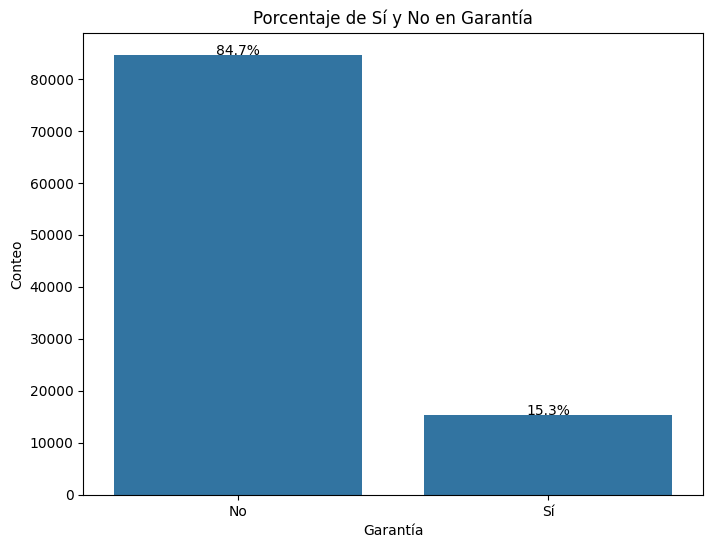

In [17]:
# Calcula los conteos de 'Sí' y 'No'
conteo_garantia = df.warranty.value_counts()

# Calcula los porcentajes
porcentaje_garantia = (conteo_garantia / conteo_garantia.sum()) * 100

# Crea un DataFrame para el gráfico
df_grafico = pd.DataFrame({
    'Garantia': conteo_garantia.index,
    'Conteo': conteo_garantia.values,
    'Porcentaje': porcentaje_garantia.values
})

# Crea el gráfico de barras con porcentajes
plt.figure(figsize=(8, 6))
sns.barplot(x='Garantia', y='Conteo', data=df_grafico)
plt.title('Porcentaje de Sí y No en Garantía')
plt.xlabel('Garantía')
plt.ylabel('Conteo')

# Añade las etiquetas de porcentaje al gráfico
for index, row in df_grafico.iterrows():
    plt.text(row.name, row.Conteo, f'{row.Porcentaje:.1f}%', color='black', ha='center')

plt.show()

con un 84.7% de no en los datos podemos conlcuir que se tiene muy poca dispercion de los datos como para que la colunma nos sea de valor para el modelo 

In [18]:
df.seller_address.head(20)

0     {'comment': '', 'longitude': -58.3986709, 'id'...
1     {'comment': '', 'longitude': -58.5059173, 'id'...
2     {'comment': '', 'longitude': -58.4143948, 'id'...
3     {'comment': '', 'longitude': -58.4929208, 'id'...
4     {'comment': '', 'longitude': -58.5495042, 'id'...
5     {'comment': '', 'longitude': -58.5373541, 'id'...
6     {'comment': '', 'longitude': -58.3767787, 'id'...
7     {'comment': '', 'longitude': -58.4927597, 'id'...
8     {'comment': '', 'longitude': -58.47917, 'id': ...
9     {'comment': '', 'longitude': -58.4900327, 'id'...
10    {'comment': '', 'longitude': -58.7583331, 'id'...
11    {'comment': '', 'longitude': '', 'id': 1650896...
12    {'comment': '', 'longitude': -58.3815931, 'id'...
13    {'comment': '', 'longitude': -59.1083833, 'id'...
14    {'comment': '', 'longitude': -60.6890492, 'id'...
15    {'comment': '', 'longitude': -58.6340294, 'id'...
16    {'comment': '', 'longitude': -58.58479, 'id': ...
17    {'comment': '', 'longitude': '', 'id': 143

In [19]:
seller_address = df['seller_address']
df_seller_address = pd.json_normalize(seller_address)
df_seller_address.head(20)

,comment,longitude,id,address_line,latitude,zip_code,country.name,country.id,search_location.neighborhood.name,search_location.neighborhood.id,search_location.state.name,search_location.state.id,search_location.city.name,search_location.city.id,city.name,city.id,state.name,state.id
0,,-58.398671,78162842,,-34.62807,,Argentina,AR,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C
1,,-58.505917,105272448,,-34.593552,,Argentina,AR,Villa Devoto,TUxBQlZJTDYzNzZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Buenos Aires,,Capital Federal,AR-C
2,,-58.414395,103489016,,-34.623391,,Argentina,AR,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C
3,,-58.492921,109827639,,-34.628189,,Argentina,AR,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C
4,,-58.549504,2825909,,-34.634655,,Argentina,AR,,,Bs.As. G.B.A. Oeste,TUxBUEdSQWVmNTVm,Tres de febrero,TUxBQ1RSRTMxODE5NA,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B
5,,-58.537354,100208293,,-34.517389,,Argentina,AR,Villa Adelina,TUxBQlZJTDI2MDZa,Bs.As. G.B.A. Norte,TUxBUEdSQWU4ZDkz,San Isidro,TUxBQ1NBTjg4ZmJk,Villa Adelina,,Buenos Aires,AR-B
6,,-58.376779,8592998,,-34.642826,,Argentina,AR,Barracas,TUxBQkJBUjM0MDha,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Barracas,TUxBQkJBUjM0MDha,Capital Federal,AR-C
7,,-58.49276,78966869,,-34.650742,,Argentina,AR,,,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Avellaneda/Capital Federal,,Buenos Aires,AR-B
8,,-58.47917,151533950,,-34.58502,,Argentina,AR,,,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Capital Federal,,Capital Federal,AR-C
9,,-58.490033,145911036,,-34.811316,,Argentina,AR,Monte Grande,TUxBQk1PTjM0MDla,Bs.As. G.B.A. Sur,TUxBUEdSQXJlMDNm,Esteban Echeverría,TUxBQ0VTVGViYW5l,monte grande,,Buenos Aires,AR-B


como podemos observar los datos presentes en comment	longitude	id	address_line	latitude	zip_code	country.name	country.id	 no nos sirven de mucho ya que proporcionan informacion que no es de utiliadad para el modelo

In [20]:
df_seller_address = df_seller_address.drop(columns=['comment', 'longitude', 'id','address_line','zip_code','latitude'])
df_seller_address.head(20)

,country.name,country.id,search_location.neighborhood.name,search_location.neighborhood.id,search_location.state.name,search_location.state.id,search_location.city.name,search_location.city.id,city.name,city.id,state.name,state.id
0,Argentina,AR,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C
1,Argentina,AR,Villa Devoto,TUxBQlZJTDYzNzZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Buenos Aires,,Capital Federal,AR-C
2,Argentina,AR,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C
3,Argentina,AR,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C
4,Argentina,AR,,,Bs.As. G.B.A. Oeste,TUxBUEdSQWVmNTVm,Tres de febrero,TUxBQ1RSRTMxODE5NA,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B
5,Argentina,AR,Villa Adelina,TUxBQlZJTDI2MDZa,Bs.As. G.B.A. Norte,TUxBUEdSQWU4ZDkz,San Isidro,TUxBQ1NBTjg4ZmJk,Villa Adelina,,Buenos Aires,AR-B
6,Argentina,AR,Barracas,TUxBQkJBUjM0MDha,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Barracas,TUxBQkJBUjM0MDha,Capital Federal,AR-C
7,Argentina,AR,,,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Avellaneda/Capital Federal,,Buenos Aires,AR-B
8,Argentina,AR,,,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Capital Federal,,Capital Federal,AR-C
9,Argentina,AR,Monte Grande,TUxBQk1PTjM0MDla,Bs.As. G.B.A. Sur,TUxBUEdSQXJlMDNm,Esteban Echeverría,TUxBQ0VTVGViYW5l,monte grande,,Buenos Aires,AR-B


In [21]:
df_seller_address = df_seller_address.drop(columns=['search_location.state.id','search_location.city.id','city.id','country.id','search_location.neighborhood.id','state.id'])
df_seller_address.head(10)

,country.name,search_location.neighborhood.name,search_location.state.name,search_location.city.name,city.name,state.name
0,Argentina,San Cristóbal,Capital Federal,Capital Federal,San Cristóbal,Capital Federal
1,Argentina,Villa Devoto,Capital Federal,Capital Federal,Buenos Aires,Capital Federal
2,Argentina,Boedo,Capital Federal,Capital Federal,Boedo,Capital Federal
3,Argentina,Floresta,Capital Federal,Capital Federal,Floresta,Capital Federal
4,Argentina,,Bs.As. G.B.A. Oeste,Tres de febrero,Tres de febrero,Buenos Aires
5,Argentina,Villa Adelina,Bs.As. G.B.A. Norte,San Isidro,Villa Adelina,Buenos Aires
6,Argentina,Barracas,Capital Federal,Capital Federal,Barracas,Capital Federal
7,Argentina,,Capital Federal,Capital Federal,Avellaneda/Capital Federal,Buenos Aires
8,Argentina,,Capital Federal,Capital Federal,Capital Federal,Capital Federal
9,Argentina,Monte Grande,Bs.As. G.B.A. Sur,Esteban Echeverría,monte grande,Buenos Aires


una vez quitado las colunmas que son innecesarias para el estudio que son todas las que tienen id relacionados vamos a explorar la informacion presente en el dataframe

In [22]:
df_seller_address['country.name'].value_counts()

country.name
Argentina    99997
                 3
Name: count, dtype: int64

In [23]:
df_seller_address['city.name'].value_counts()

city.name
CABA                             4098
Buenos Aires                     3420
Capital Federal                  3402
Palermo                          3355
Caballito                        2967
                                 ... 
general Pacheco                     1
Tortugas (Pan. Pilar KM 38.5)       1
Campo Santo                         1
lomas del mir                       1
Capital  Federal                    1
Name: count, Length: 3656, dtype: int64

In [24]:
# 1. Contar la frecuencia de cada ciudad
city_counts = df_seller_address['city.name'].value_counts()

# 2. Convertir los conteos en un DataFrame
df_frecuencia = pd.DataFrame({
    'Ciudad': city_counts.index,
    'Frecuencia': city_counts.values
})

# 3. Mostrar la tabla de frecuencias
print(df_frecuencia)

# Si quieres mostrar solo las N ciudades más frecuentes:
N = 10  # Define el número de ciudades más frecuentes a mostrar
print(f"\nLas {N} ciudades más frecuentes:\n")
print(df_frecuencia.head(N))


                             Ciudad  Frecuencia
0                              CABA        4098
1                      Buenos Aires        3420
2                   Capital Federal        3402
3                           Palermo        3355
4                         Caballito        2967
...                             ...         ...
3651                general Pacheco           1
3652  Tortugas (Pan. Pilar KM 38.5)           1
3653                    Campo Santo           1
3654                  lomas del mir           1
3655               Capital  Federal           1

[3656 rows x 2 columns]

Las 10 ciudades más frecuentes:

            Ciudad  Frecuencia
0             CABA        4098
1     Buenos Aires        3420
2  Capital Federal        3402
3          Palermo        3355
4        Caballito        2967
5         Belgrano        2333
6     buenos aires        2073
7  capital federal        1872
8          Rosario        1715
9           Flores        1595


vemos que hay muchos valores con un solo registo lo cual nos lleva a decir que para simplificar mejor esto vamos a re nombrar esos datos con un solo registros a otros para que asi sea mas sencillo analizarlos

In [25]:
# 1. Contar la frecuencia de cada ciudad
city_counts = df_seller_address['city.name'].value_counts()

# 2. Crear una Serie con las ciudades renombradas
ciudades_agrupadas = df_seller_address['city.name'].map(lambda x: 'Otros' if city_counts[x] <= 10 else x)


# 3. Convertir los conteos en un DataFrame
df_frecuencia = pd.DataFrame({
    'Ciudad': ciudades_agrupadas.value_counts().index,
    'Frecuencia': ciudades_agrupadas.value_counts().values
})

# 4. Mostrar la tabla de frecuencias
print(df_frecuencia)

# 5. Si quieres mostrar solo las N ciudades más frecuentes:
N = 10  # Define el número de ciudades más frecuentes a mostrar
print(f"\nLas {N} ciudades más frecuentes:\n")
print(df_frecuencia.head(N))

                                                Ciudad  Frecuencia
0                                                Otros        6651
1                                                 CABA        4098
2                                         Buenos Aires        3420
3                                      Capital Federal        3402
4                                              Palermo        3355
..                                                 ...         ...
668                                              pilar          11
669  Recoleta, unicamente con cita previa, llamar d...          11
670                             Villa General Belgrano          11
671                                         la tablada          11
672                                   Gral. San Martin          11

[673 rows x 2 columns]

Las 10 ciudades más frecuentes:

            Ciudad  Frecuencia
0            Otros        6651
1             CABA        4098
2     Buenos Aires        3420
3  Capital Fed

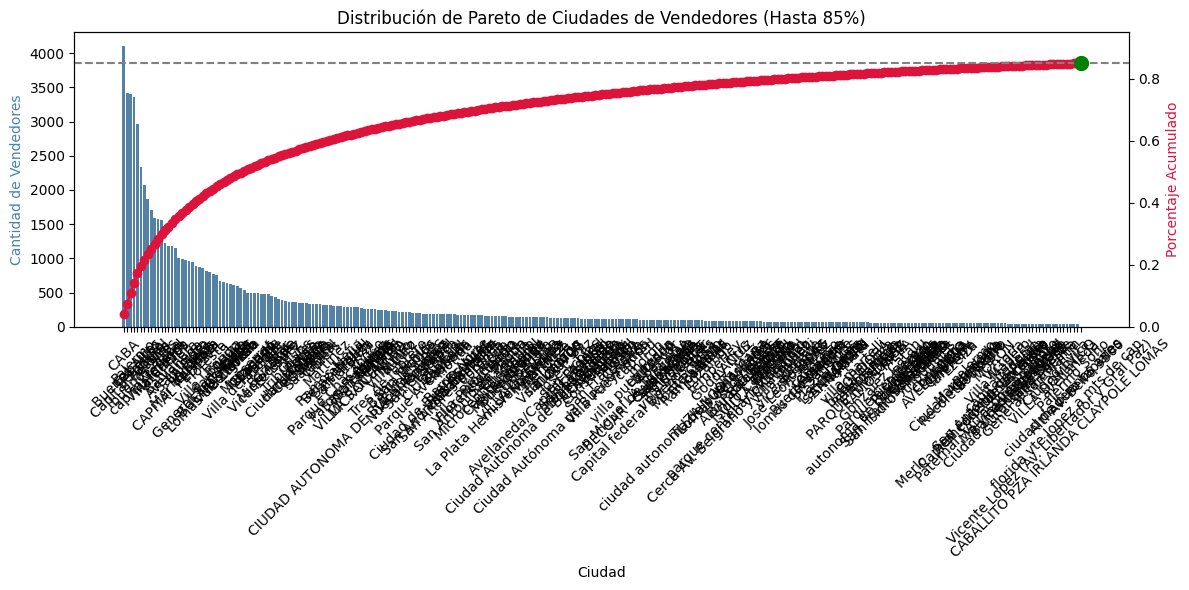

In [32]:
# 1. Contar la frecuencia de cada ciudad
city_counts = df_seller_address['city.name'].value_counts()
df_pareto = pd.DataFrame({'Ciudad': city_counts.index, 'Frecuencia': city_counts.values})

# 2. Calcular el porcentaje acumulado
df_pareto['Porcentaje_Acumulado'] = df_pareto['Frecuencia'].cumsum() / df_pareto['Frecuencia'].sum()

# 3. Encontrar la ciudad donde el porcentaje acumulado alcanza o supera el 85%
umbral_85_porciento = 0.85
ciudad_85_porciento = df_pareto[df_pareto['Porcentaje_Acumulado'] >= umbral_85_porciento].iloc[0]
indice_85_porciento = df_pareto[df_pareto['Porcentaje_Acumulado'] >= umbral_85_porciento].index[0]

# 4. Filtrar el DataFrame para incluir solo las ciudades hasta el 85%
df_pareto_hasta_85 = df_pareto[df_pareto['Porcentaje_Acumulado'] <= umbral_85_porciento]

# 5. Crear el gráfico de Pareto
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=df_pareto_hasta_85['Ciudad'], y=df_pareto_hasta_85['Frecuencia'], color='steelblue', ax=ax) # Usando el DataFrame filtrado
ax2 = ax.twinx()
ax2.plot(df_pareto_hasta_85['Ciudad'], df_pareto_hasta_85['Porcentaje_Acumulado'], color='crimson', marker='o', linestyle='-')
ax2.axhline(umbral_85_porciento, color='gray', linestyle='--', label='85% Umbral')
ax2.plot(ciudad_85_porciento['Ciudad'], umbral_85_porciento, color='green', marker='o', markersize=10)  # Marca el punto del 85%
ax.set_title('Distribución de Pareto de Ciudades de Vendedores (Hasta 85%)') # Nuevo título
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de Vendedores', color='steelblue')
ax2.set_ylabel('Porcentaje Acumulado', color='crimson')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

# Limitando el eje y del gráfico derecho (porcentaje acumulado)
ax2.set_ylim(0, umbral_85_porciento + 0.10)
plt.show()


Bueno aqui vamos a aclarar algo y es que segun informacion de intertent (www.mascomunidad.org.ar) nos indica que argentina que es el pais donde se centra este data set tiene alrededor de 1000 ciudades, aqui vemos que la colunma "city.name" tiene alrededor de 3600 ciudades lo que excede en mas de tres veces el valor real, lo que nos lleva a pensar que hay muchisima informacion que esta mal catalogada o que presenta registros unicos que pueden ser lo mismo por lo que voy a descartar esta colunma de momento y voy a busacr de algo que lo describa de mejor forma la distribucion de los datos

In [ ]:
print(df_seller_address['state.name'].value_counts())
df_seller_address['state.name'].

state.name
Capital Federal        57854
Buenos Aires           35013
Santa Fe                2672
Córdoba                 1908
Mendoza                  450
Chubut                   375
Entre Ríos               287
Tucumán                  237
San Juan                 151
Salta                    146
Misiones                 143
Río Negro                140
Corrientes               124
Neuquén                  101
La Pampa                  86
Chaco                     77
San Luis                  60
Jujuy                     40
Santiago del Estero       29
Formosa                   28
Santa Cruz                25
Catamarca                 21
La Rioja                  18
Tierra del Fuego          12
                           3
Name: count, dtype: int64
